# using a 16bit ADC 2^16 = 65536
ie 3volts/65536 = 0.0457763671875mV per step resolution 
ADC Module used: https://cdn-learn.adafruit.com/downloads/pdf/adafruit-4-channel-adc-breakouts.pdf?timestamp=1632809212

In [1]:
VDD = 3
bits = 16
step_size = VDD/2**bits
print("absolute step size = ", step_size)
accurate_bits = 13
step_size_practical = VDD/2**accurate_bits
print("accurate step size = ", step_size_practical)

absolute step size =  4.57763671875e-05
accurate step size =  0.0003662109375


We need to calibrate sensors based on a known input vector X (ADC reading) to output vector Y Force Reading kg, pounds or newtons. (we could start with pounds if using known mass or Newtons if we use the strain gague.)

(11, 1)
(11,)
-3.311148086522463 [0.01663894]


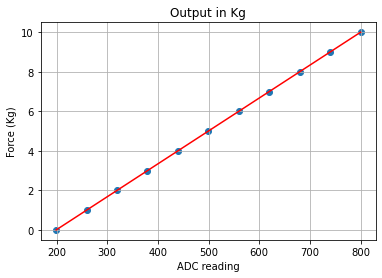

In [2]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression as lr


X = np.linspace(199,800,11).reshape(-1,1)
Y = np.array([0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0])
print(X.shape)
print(Y.shape)
model = lr()
model.fit(X,Y)
plt.scatter(X,Y)
plt.plot(X,model.predict(X) ,'r') 
plt.title("Output in Kg") #our model will not be linear
plt.grid()
plt.ylabel("Force (Kg)")
plt.xlabel("ADC reading")
print (model.intercept_, model.coef_) 


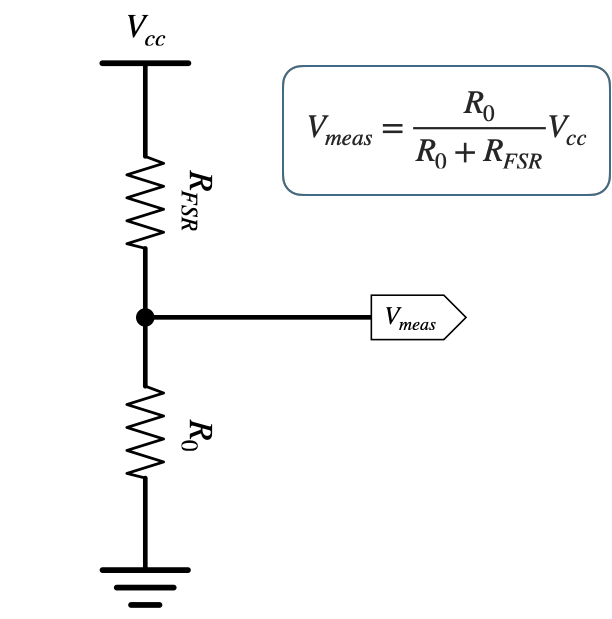

(100, 1)
(100, 1)
[5.54524018] [[6.43743904e-05]]


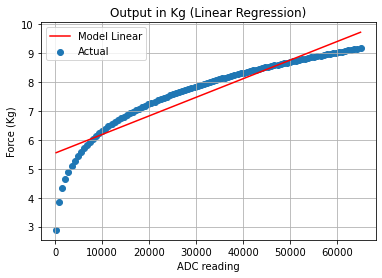

Need a non-linear regression method... 


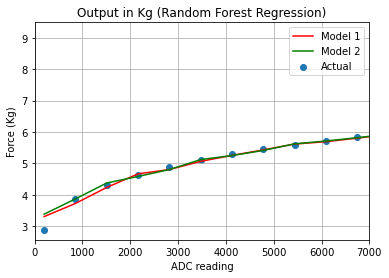

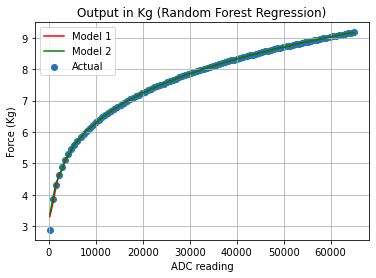

In [4]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression as lr
from sklearn.ensemble import RandomForestRegressor as nlr
import math

X = np.linspace(199.1,65000.2,100).reshape(-1,1)
#here i was trying to find a function that is similair to the behaviour of the fsr
#Y = np.array([1.1,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0]).reshape(-1,1)
#Y = 1.2**np.log(X) #X^0.18....
#Y = X**0.3-6
#Y = np.log(X)/np.log(2.7)
Y = (X)**0.2
print(X.shape)
print(Y.shape)

model = lr()
model.fit(X,Y)
plt.scatter(X,Y)
plt.plot(X,model.predict(X) ,'r') 
plt.title("Output in Kg (Linear Regression)") #our model will not be linear
plt.grid()
plt.ylabel("Force (Kg)")
plt.xlabel("ADC reading")
print (model.intercept_, model.coef_) 
plt.legend(["Model Linear", "Actual"])
plt.show()
print("Need a non-linear regression method... ")
model2 = nlr(n_estimators=100, max_features=1)
model2.fit(X,Y.ravel())
model3 = nlr(n_estimators=10, max_features=1)
model3.fit(X,Y.ravel())

plt.scatter(X,Y)
plt.plot(X,model2.predict(X) ,'r') 
plt.plot(X,model3.predict(X) ,'g') 
plt.title("Output in Kg (Random Forest Regression)")
plt.grid()
plt.ylabel("Force (Kg)")
plt.xlabel("ADC reading")
plt.xlim(0,7000)
plt.legend(["Model 1", "Model 2", "Actual"])
plt.show()
plt.scatter(X,Y)
plt.plot(X,model2.predict(X) ,'r') 
plt.plot(X,model3.predict(X) ,'g') 
plt.title("Output in Kg (Random Forest Regression)")
plt.grid()
plt.ylabel("Force (Kg)")
plt.xlabel("ADC reading")
plt.legend(["Model 1", "Model 2", "Actual"])
plt.show()

Using a non-linear model like this, we can have a set of weights and biases to multiply ADC values by right in the firmware or software. this will be fast and accurate... limited only by the precision of the sensors and hardware